In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Breast_Cancern.csv')
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
524,917897,B,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,...,11.24,22.99,74.32,376.5,0.1419,0.2243,0.08434,0.06528,0.2502,0.09209
454,911202,B,12.620,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,...,14.34,22.15,91.62,633.5,0.1225,0.1517,0.18870,0.09851,0.3270,0.07330
318,894329,B,9.042,18.90,60.07,244.5,0.09968,0.19720,0.19750,0.04908,...,10.06,23.40,68.62,297.1,0.1221,0.3748,0.46090,0.11450,0.3135,0.10550
130,866714,B,12.190,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,...,13.34,17.81,91.38,545.2,0.1427,0.2585,0.09915,0.08187,0.3469,0.09241
186,874217,M,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,...,21.31,26.36,139.20,1410.0,0.1234,0.2445,0.35380,0.15710,0.3206,0.06938


In [4]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
correlation =  df.corr()

<Axes: >

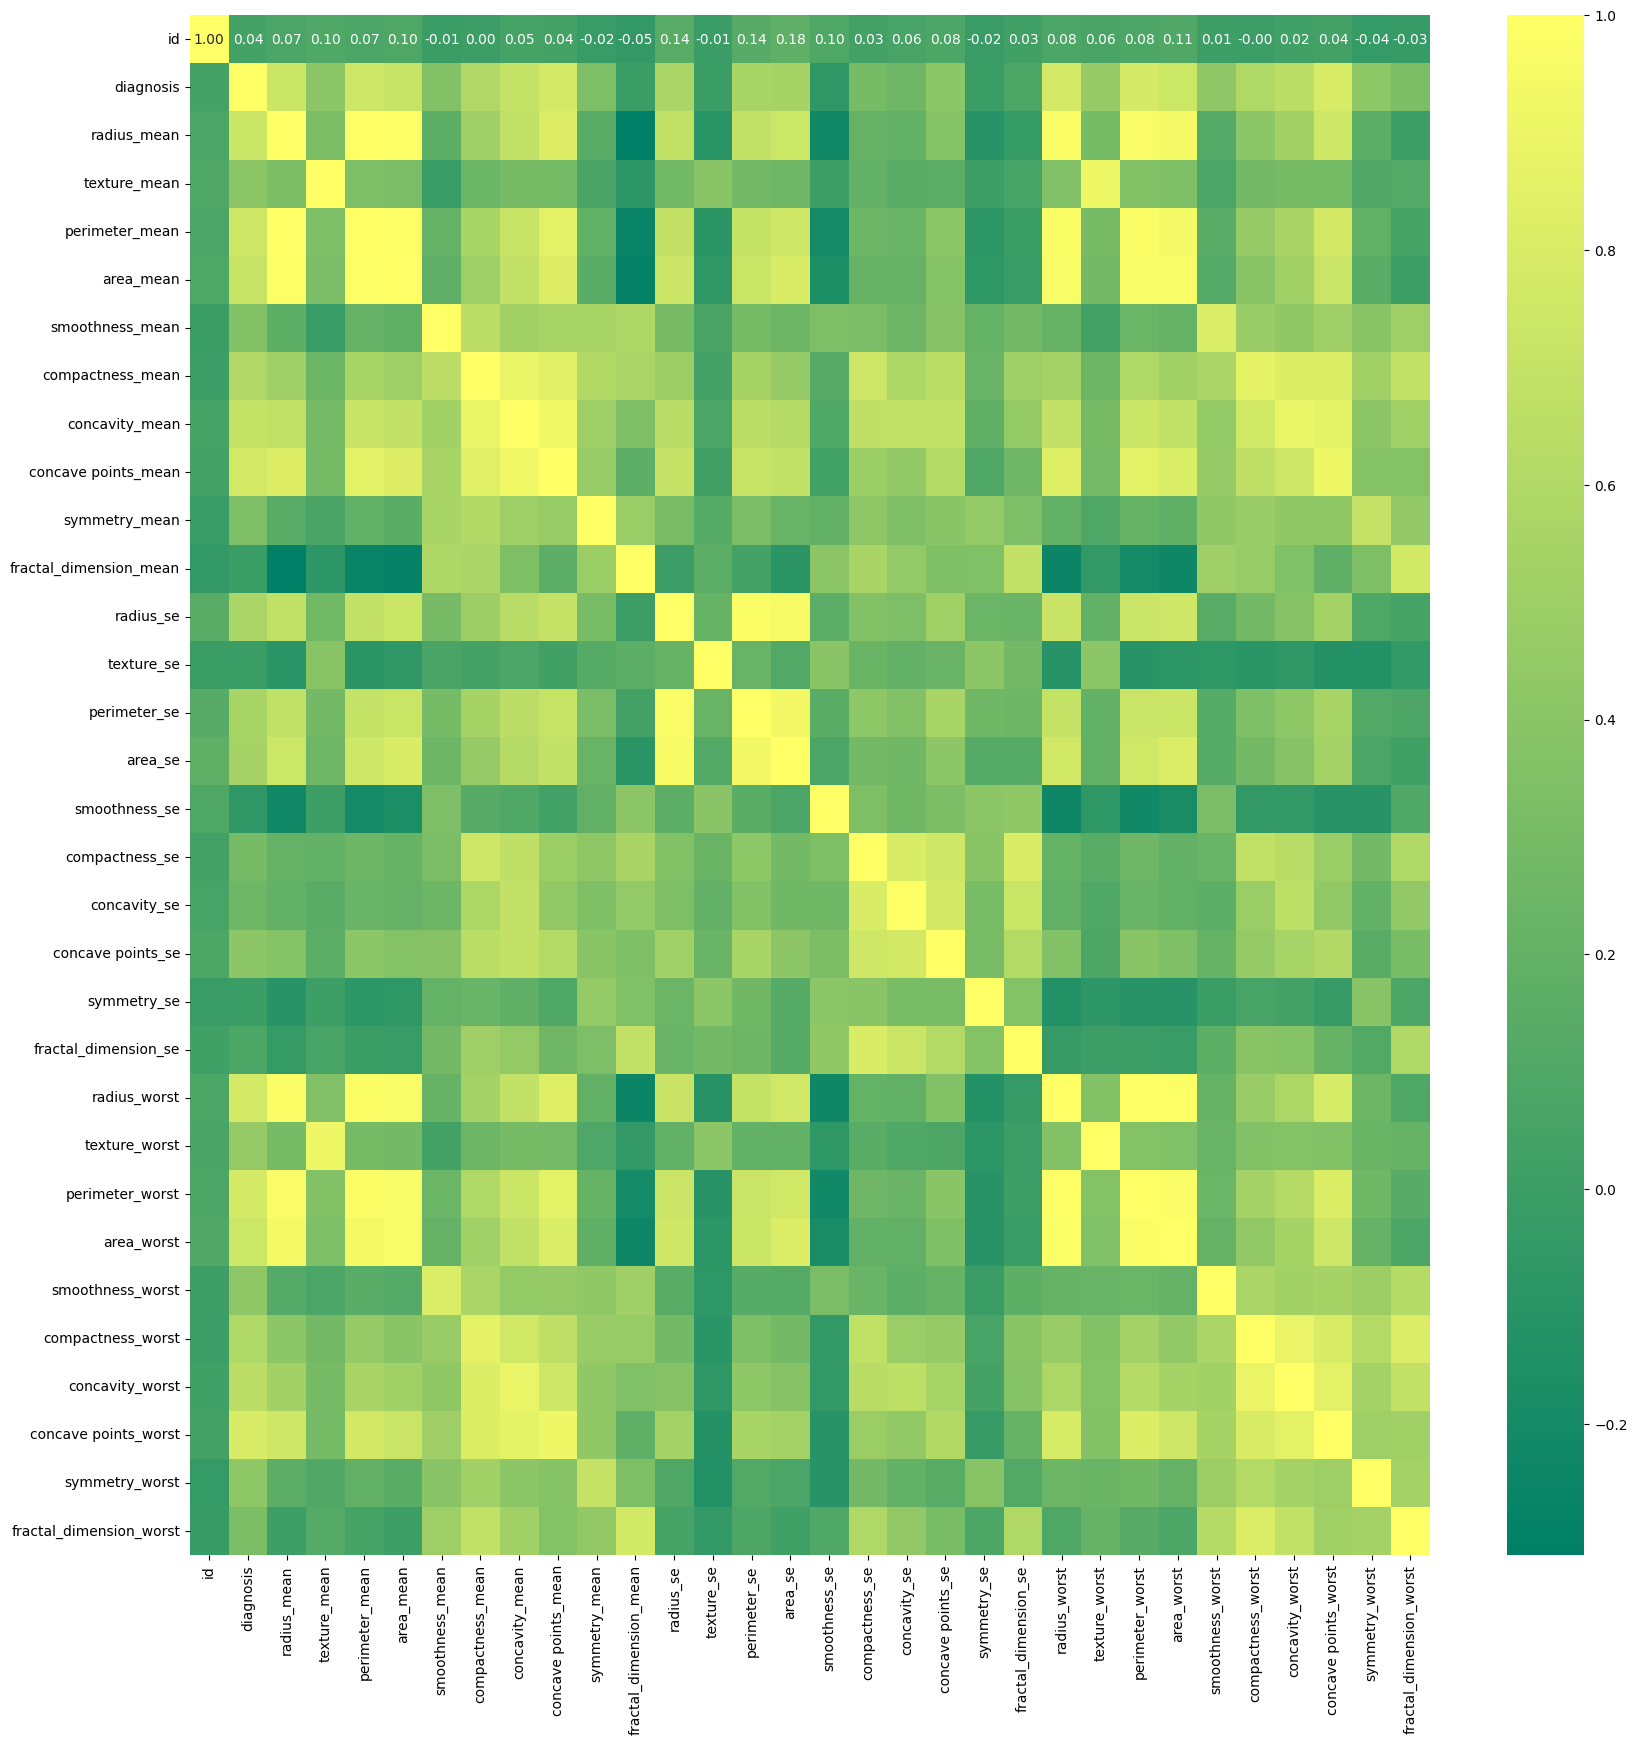

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation ,annot=True ,fmt='.2f' ,cbar=True ,cmap="summer")

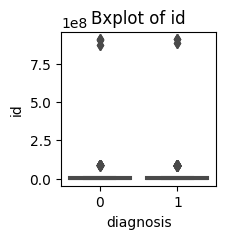

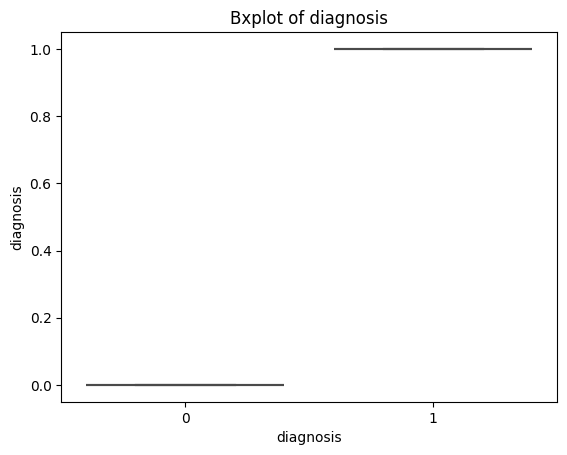

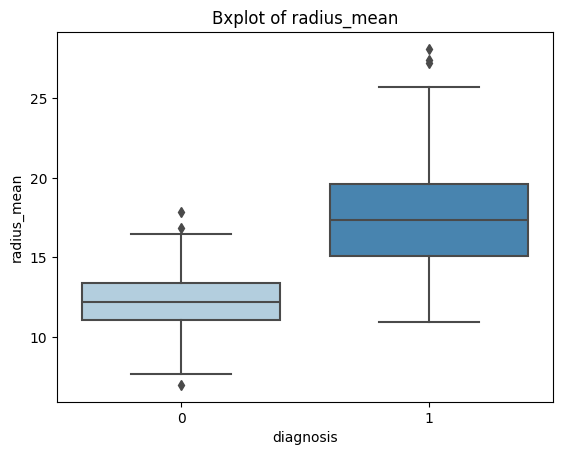

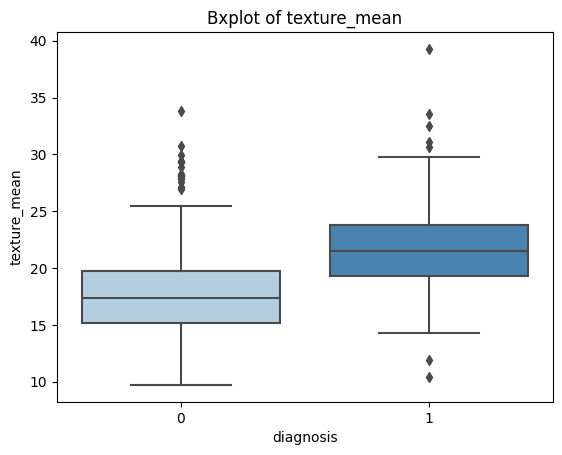

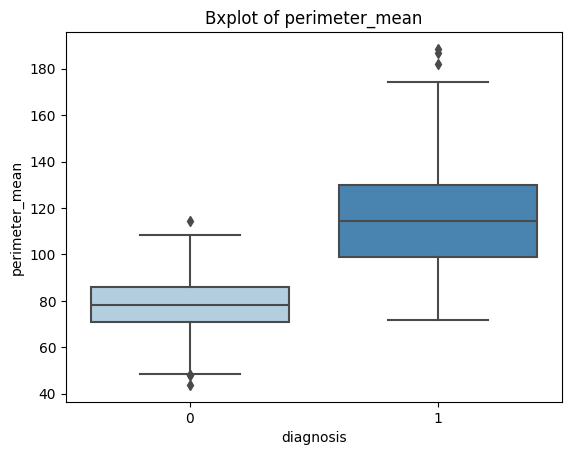

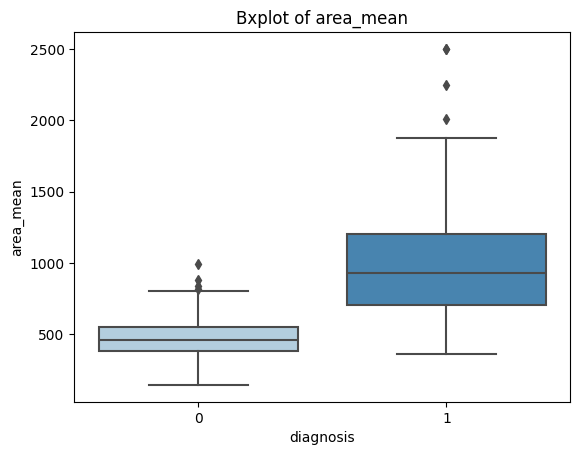

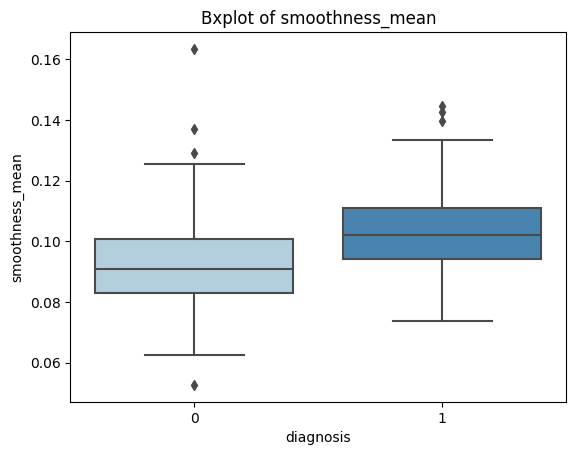

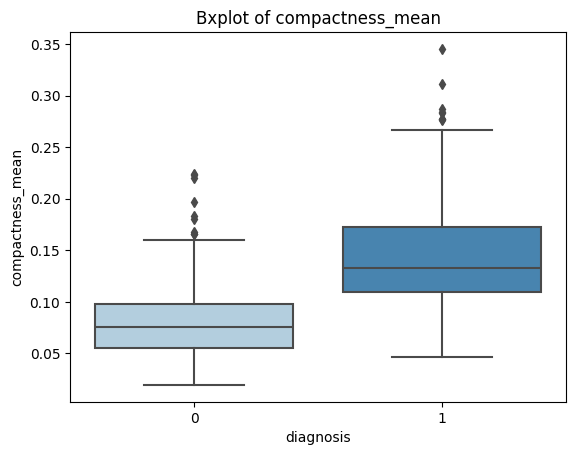

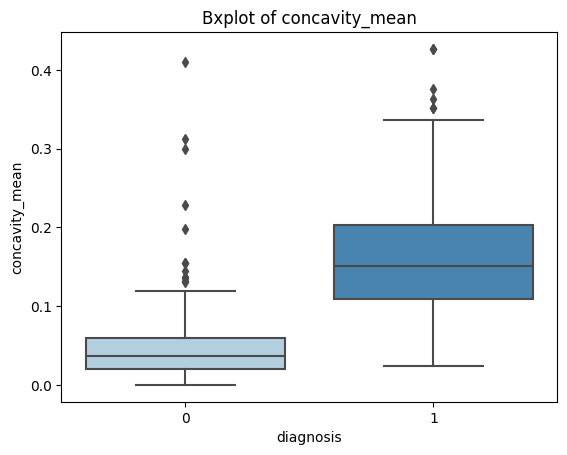

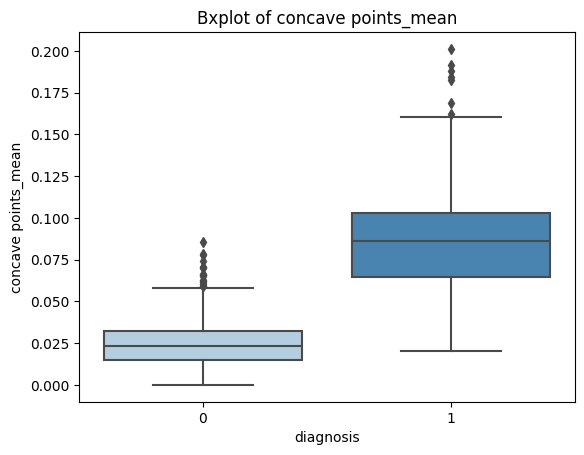

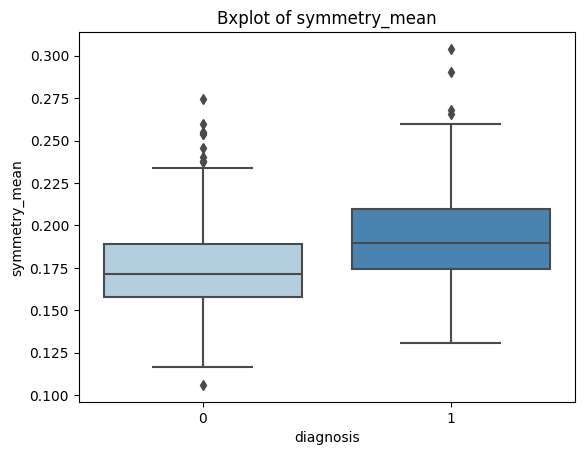

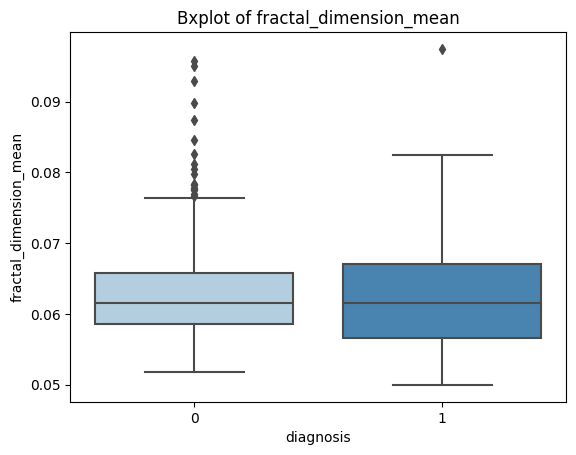

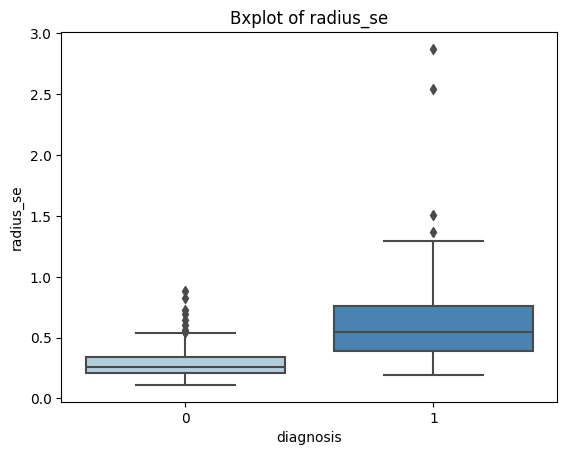

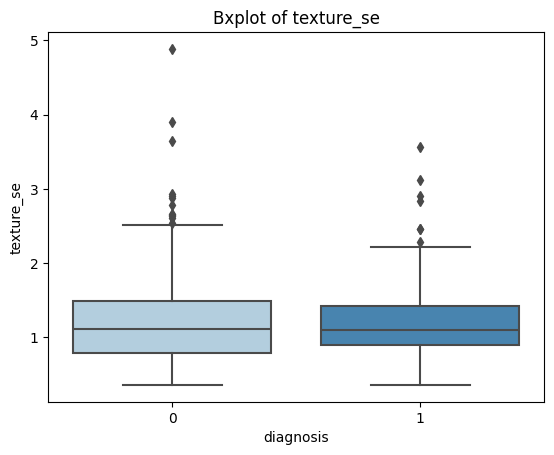

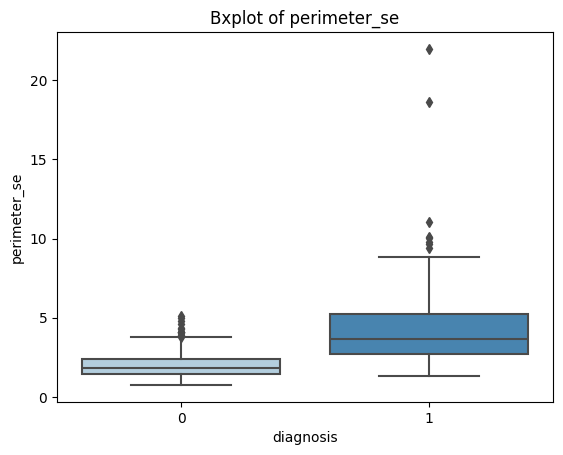

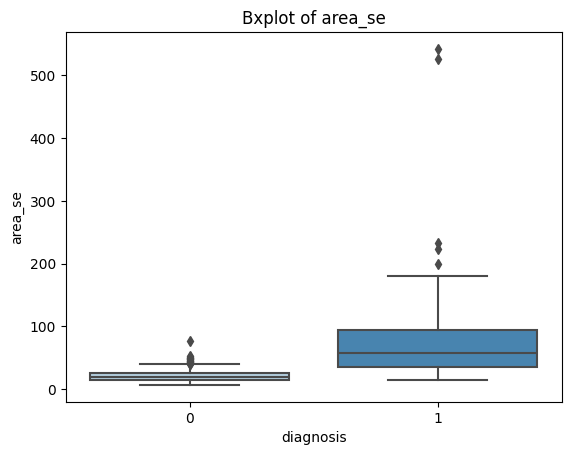

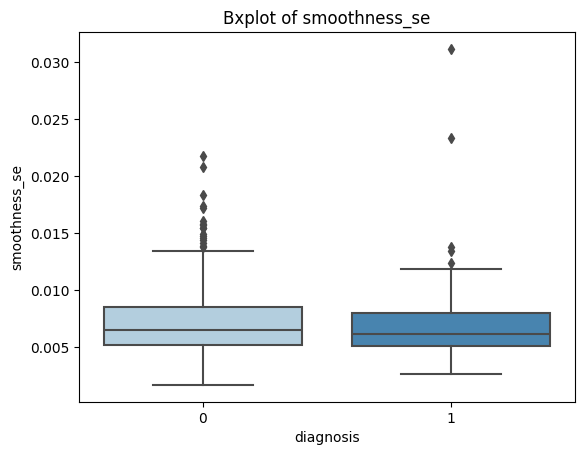

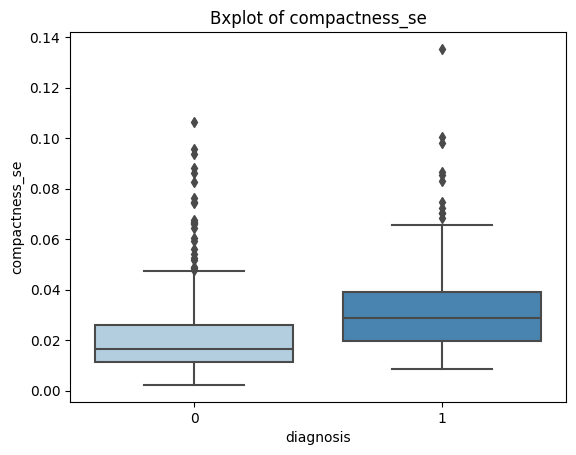

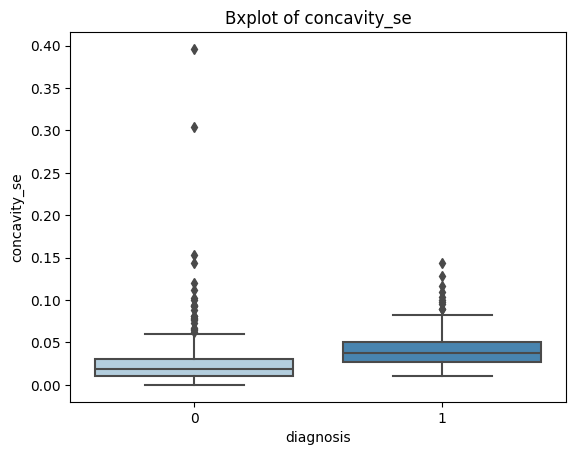

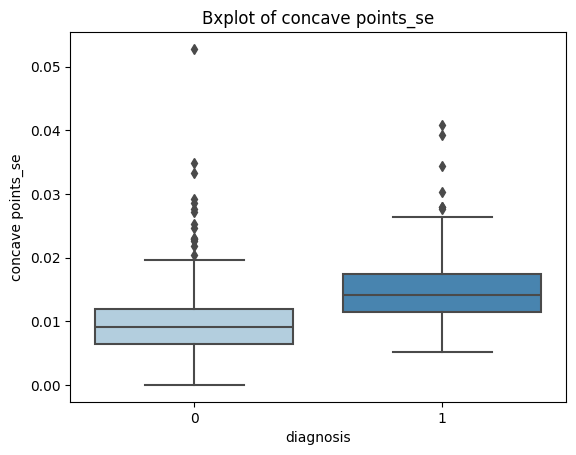

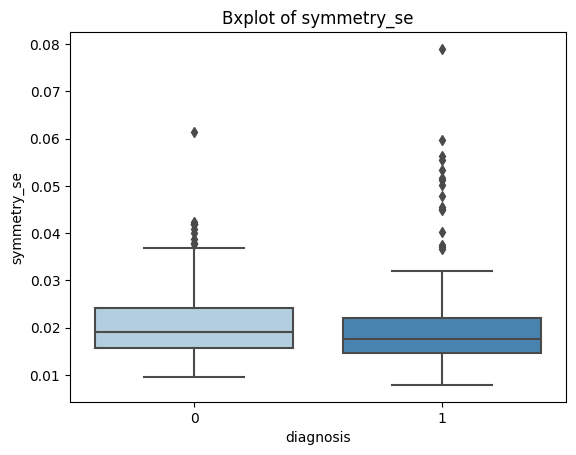

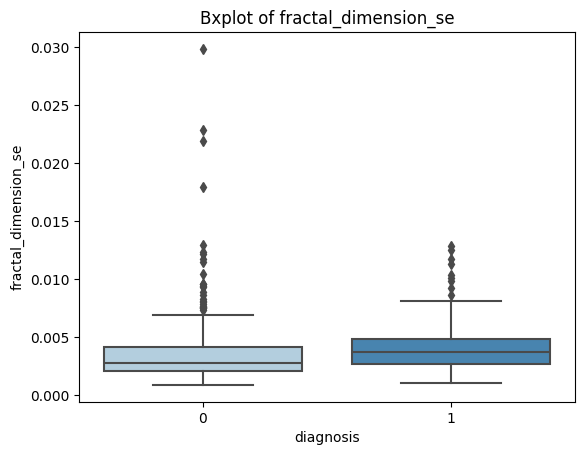

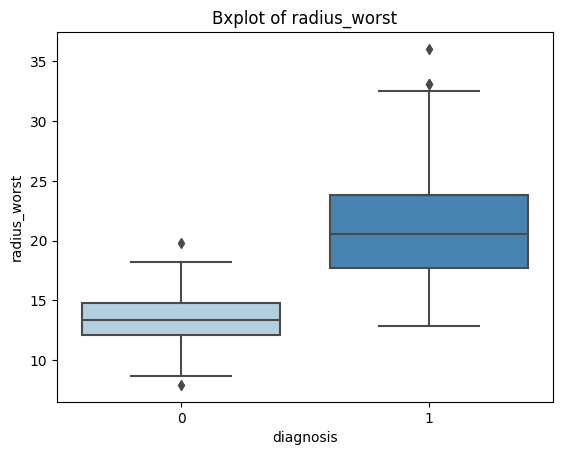

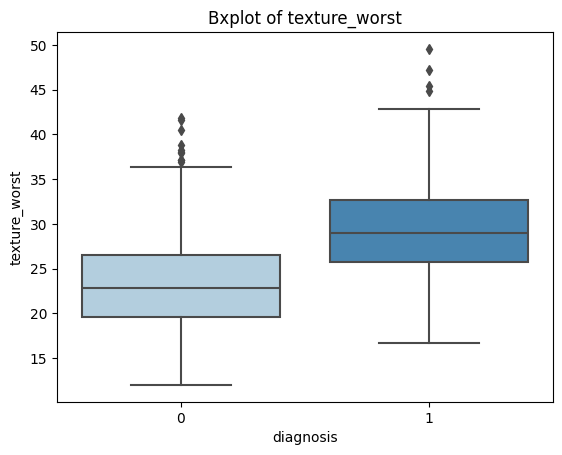

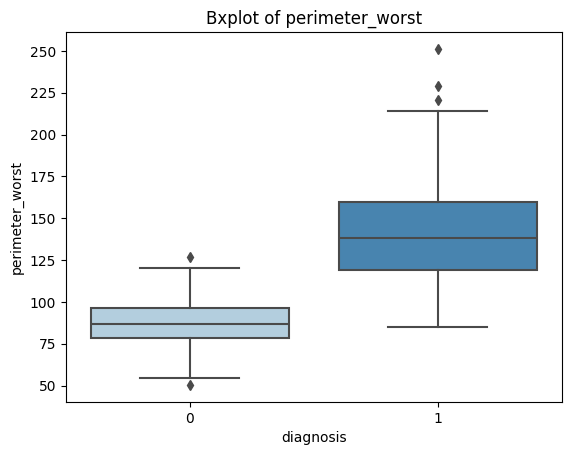

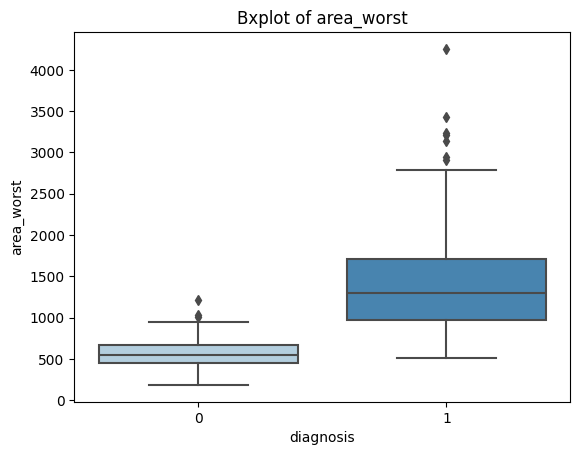

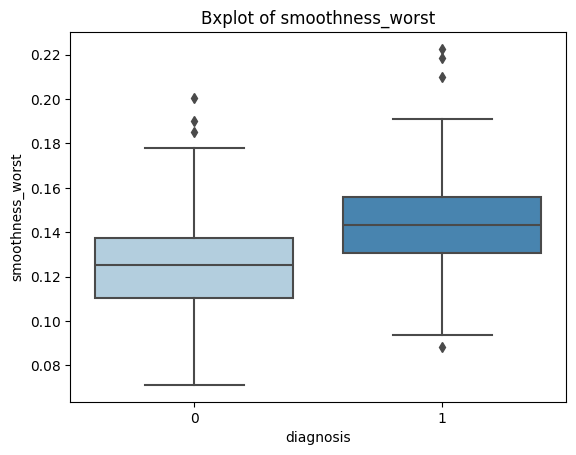

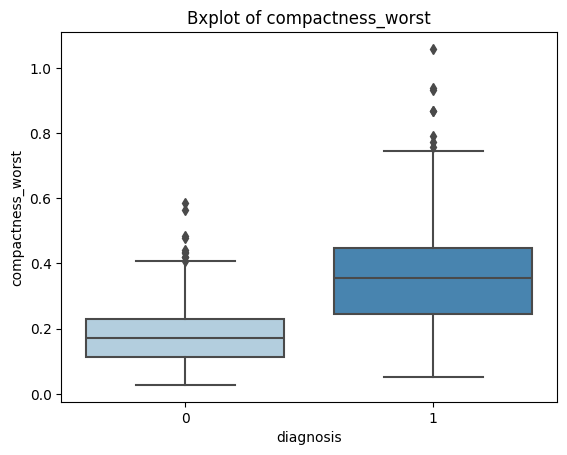

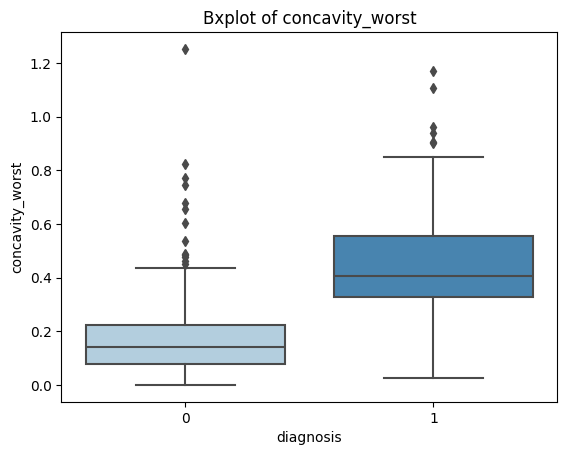

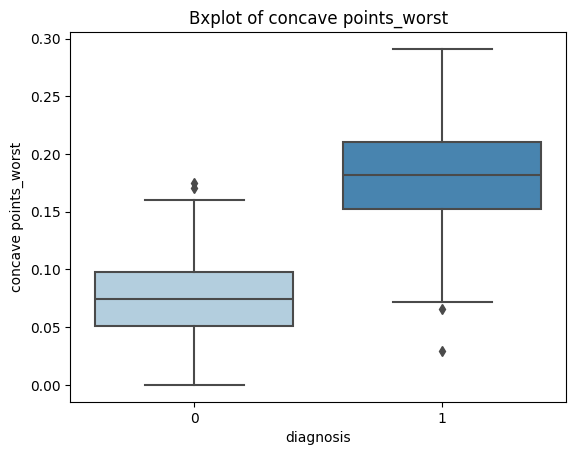

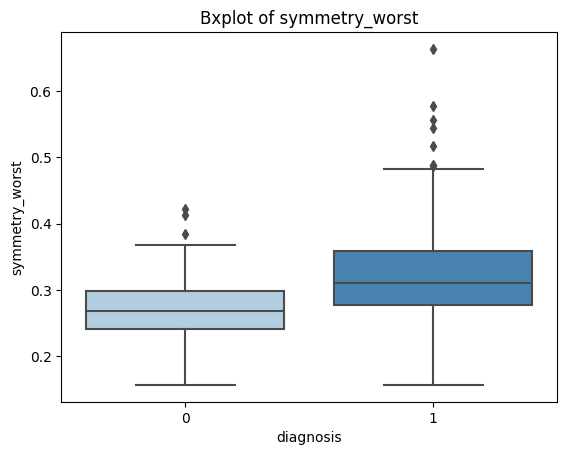

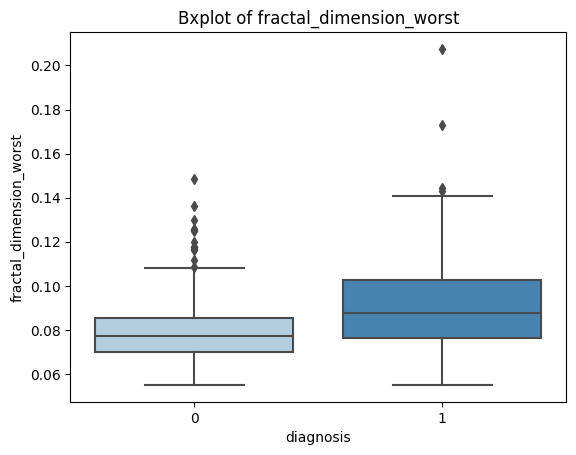

In [12]:
plt.figure(figsize=(2,2))
for feature in df.columns:
    sns.boxplot(x=df['diagnosis'],y=df[feature],palette='Blues')
    plt.title(f'Bxplot of {feature}')\
    #plt.xlabel('Diagnosis')
    plt.ylabel(feature)
    plt.show()

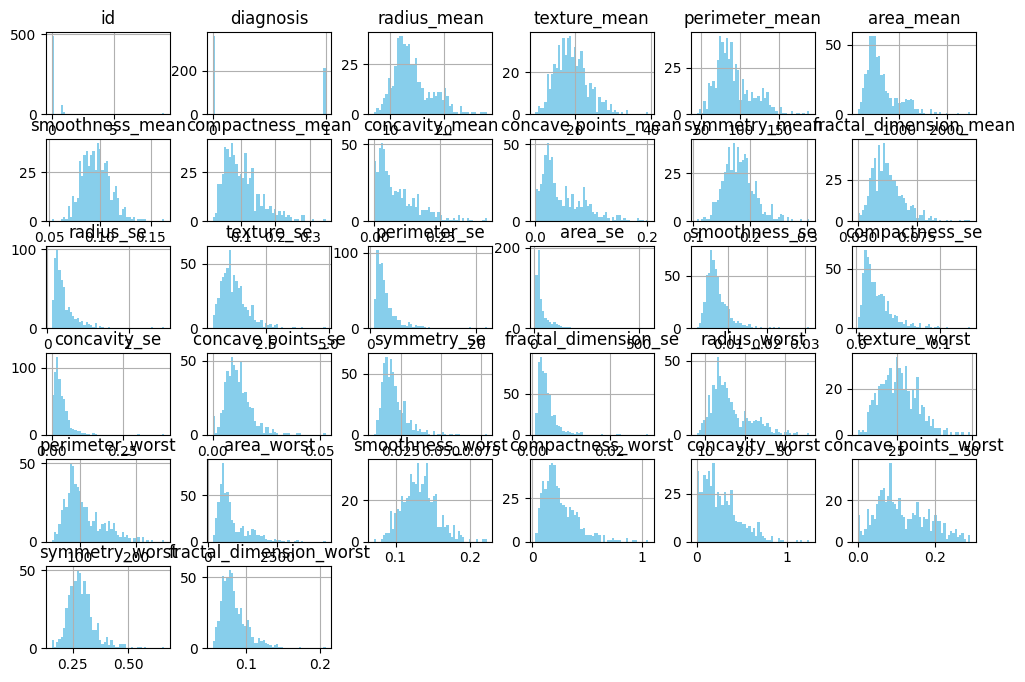

In [13]:
df.hist(bins=50,figsize=(12,8),color='skyblue')
plt.show()

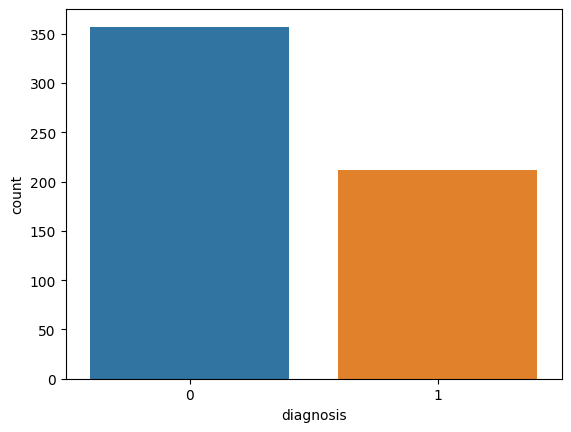

In [14]:
sns.countplot(x='diagnosis',data=df)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
sc.fit_transform(df)

array([[-0.23640517,  1.29767572,  1.09706398, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.29767572,  1.82982061, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.29767572,  1.57988811, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  1.29767572,  0.70228425, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.29767572,  1.83834103, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -0.77060855, -1.80840125, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [17]:
X = df.drop(columns=['diagnosis','id'],axis=1)
y = df['diagnosis']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=40)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
lr = LogisticRegression(max_iter=3100)

In [21]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=3100)

In [22]:
y_pred = lr.predict(X_test)

In [23]:
lr_accuracy = accuracy_score(y_test, y_pred)
lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_classification_rep = classification_report(y_test, y_pred)

In [24]:
print(f'lr_Accuracy: {lr_accuracy:.2f}')
print('\nlr_Confusion Matrix:')
print(lr_conf_matrix)
print('\nlr_Classification Report:')
print(lr_classification_rep)

lr_Accuracy: 0.97

lr_Confusion Matrix:
[[95  3]
 [ 1 44]]

lr_Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        98
           1       0.94      0.98      0.96        45

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



<Axes: >

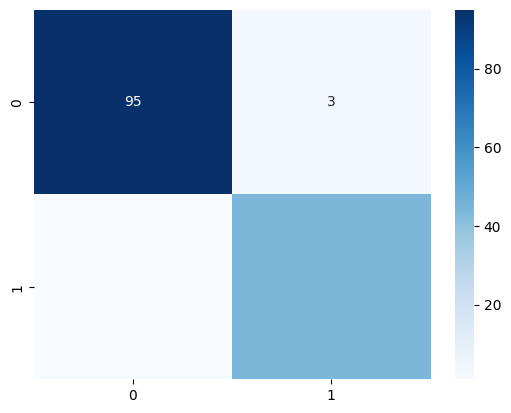

In [25]:
sns.heatmap(lr_conf_matrix, annot=True, cmap="Blues")

In [26]:
from sklearn.model_selection import cross_val_score
scores = np.mean(cross_val_score(lr,X,y,cv=10))
scores

0.9543233082706767

In [27]:
# save model
import pickle
pickle.dump(lr,open('LR.pkl','wb'))